# Importar librerias:

In [ ]:
import pandas as pd
from plotnine import *



In [ ]:
restaurante = pd.read_excel("Restaurante.xlsx")
restaurante.columns

Index(['Orden', 'Fecha', 'Hora de Cobro', 'Mesa', 'Atendió', 'Tipo',
       'Producto', 'Categoria', 'Precio', 'Costo', 'Propina',
       'Tipo de Cliente'],
      dtype='object')

#Columnas relevantes

In [ ]:
princi_restaurante = restaurante[['Tipo', 'Categoria', 'Precio', 'Costo', 'Propina',
       'Tipo de Cliente']]


# Inspeccionar las primeras 2 filas y los tipos de datos del conjunto de datos

In [ ]:
princi_restaurante.head()

,Tipo,Categoria,Precio,Costo,Propina,Tipo de Cliente
0,Bebida,Cervezas,25,18.00,0.07,Cliente Nuevo
1,Bebida,Bebida no Alcohol,25,18.00,0.07,Cliente Nuevo
2,Bebida,Bebida no Alcohol,18,12.60,0.07,Cliente Nuevo
3,Bebida,Bebida no Alcohol,25,18.50,0.07,Cliente Nuevo
4,Comida,Ensaladas,89,75.65,0.07,Cliente Nuevo


In [ ]:
princi_restaurante.shape

(30133, 6)

In [ ]:
princi_restaurante.dtypes

Tipo                object
Categoria           object
Precio               int64
Costo              float64
Propina            float64
Tipo de Cliente     object
dtype: object

# Crear una variable de **Margen de beneficio**

In [ ]:
#houseprices_data['PriceperSqm'] = houseprices_data['Price']/houseprices_data['Area']

princi_restaurante['Margen_beneficio'] = (princi_restaurante['Precio'] - princi_restaurante['Costo'] ) / princi_restaurante['Precio'] * 100
princi_restaurante.head()

<ipython-input-13-1c802d823924>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Tipo,Categoria,Precio,Costo,Propina,Tipo de Cliente,Margen_beneficio
0,Bebida,Cervezas,25,18.00,0.07,Cliente Nuevo,28.0
1,Bebida,Bebida no Alcohol,25,18.00,0.07,Cliente Nuevo,28.0
2,Bebida,Bebida no Alcohol,18,12.60,0.07,Cliente Nuevo,30.0
3,Bebida,Bebida no Alcohol,25,18.50,0.07,Cliente Nuevo,26.0
4,Comida,Ensaladas,89,75.65,0.07,Cliente Nuevo,15.0


Ordenar el restaurante según **Margen de benedicios**

In [ ]:


princi_restaurante = princi_restaurante.sort_values('Margen_beneficio', ascending = False)

princi_restaurante.head(10)


,Tipo,Categoria,Precio,Costo,Propina,Tipo de Cliente,Margen_beneficio
16553,Bebida,Vinos,708,431.88,0.08,Cliente Repetido,39.0
27083,Bebida,Vinos,708,431.88,0.15,Cliente Repetido,39.0
2987,Bebida,Vinos,708,431.88,0.17,Cliente Repetido,39.0
29835,Bebida,Vinos,708,431.88,0.07,Cliente Repetido,39.0
11036,Bebida,Vinos,708,431.88,0.17,Cliente Nuevo,39.0
15194,Bebida,Vinos,708,431.88,0.12,Cliente Nuevo,39.0
28732,Bebida,Vinos,708,431.88,0.17,Cliente Nuevo,39.0
15372,Bebida,Vinos,708,431.88,0.17,Cliente Nuevo,39.0
12327,Bebida,Vinos,708,431.88,0.05,Cliente Repetido,39.0
506,Bebida,Vinos,708,431.88,0.12,Cliente Repetido,39.0


# Trazar un gráfico de barras usando GGPLOT

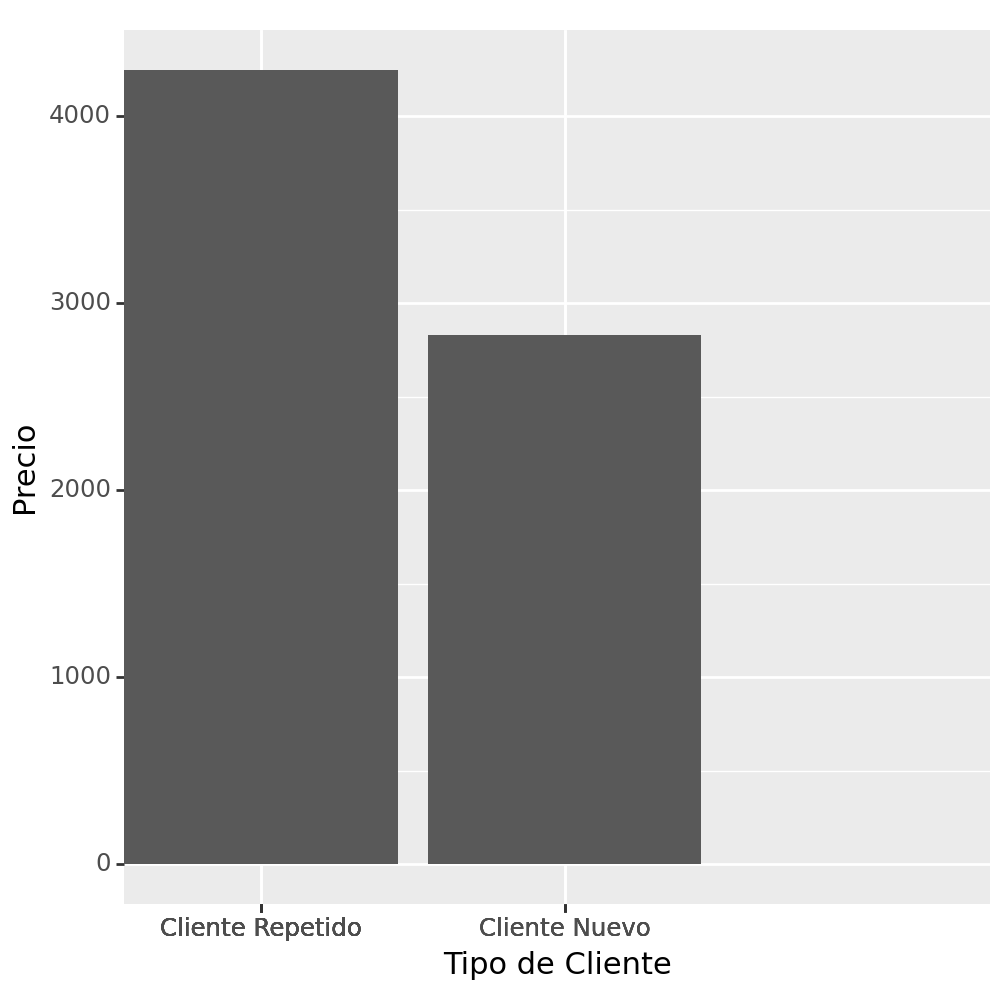

<Figure Size: (500 x 500)>

In [ ]:
chart_data = princi_restaurante[0:10]


ggplot(chart_data,aes(x='Tipo de Cliente',y = 'Precio')) + geom_bar(stat = 'identity') \
+ scale_x_discrete(limits=chart_data['Tipo de Cliente'].tolist()) + theme(figure_size=(5, 5))

#Agregue otros detalles para que el cuadro sea más informativo.

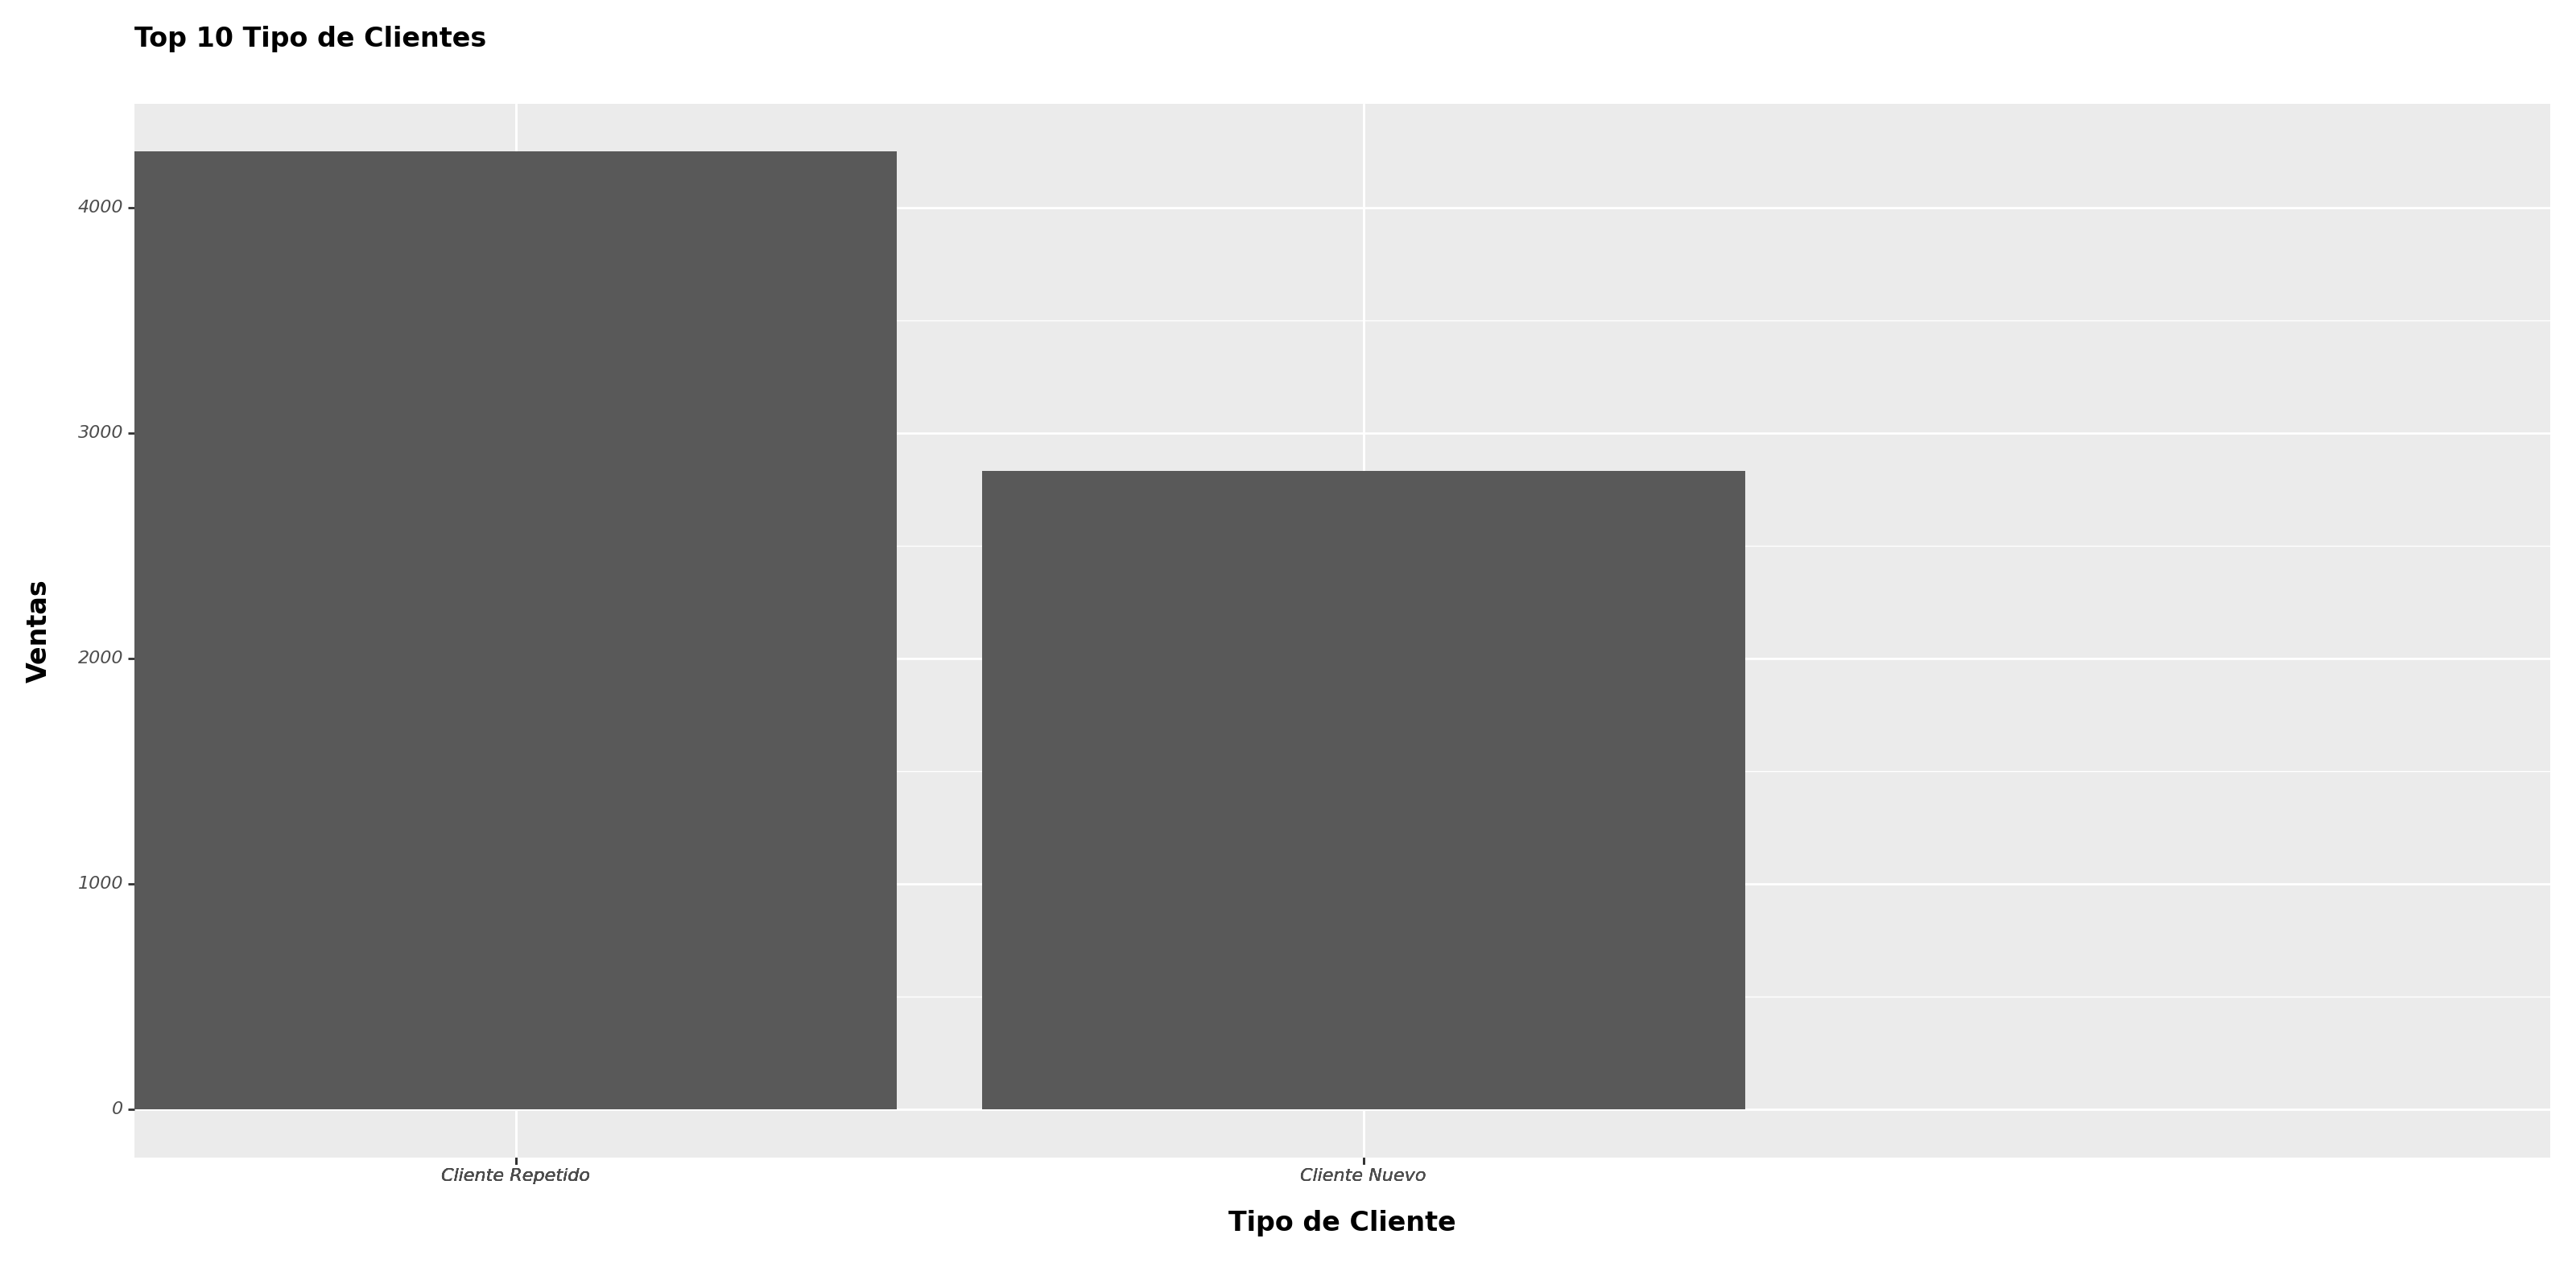

<Figure Size: (1600 x 800)>

In [ ]:
ggplot(chart_data,aes(x='Tipo de Cliente',y = 'Precio')) + geom_bar(stat = 'identity') \
+ scale_x_discrete(limits=chart_data['Tipo de Cliente'].tolist()) \
+ labs(y='Ventas', x='Tipo de Cliente', title='Top 10 Tipo de Clientes') \
+ theme(figure_size=(16, 8),
        axis_title=element_text(face='bold',size =12),
          axis_text=element_text(face='italic',size =8),
          plot_title=element_text(face='bold',
                                  size=12))